# Interactive Test01

## 项目简介：
生成了 50 组 (x, y) 坐标和 50 种不同的颜色。
使用 scatter 函数绘制了这些点。
定义了一个 on_pick 函数作为点击事件的处理器，该函数会在用户点击图表上的点时执行，打印出点击点的坐标。
使用 mpl_connect 方法将点击事件与处理器函数关联起来。
设置 scatter 对象为可拾取状态，这样当用户点击点时，pick_event 会被触发。
运行这段代码后，当你在散点图上点击任一点时，控制台就会输出这个点的坐标。

In [16]:
import matplotlib.pyplot as plt
import numpy as np
#EDIT CELL TAGS(JSON): "metadata": {"language": "python3"}

In [17]:
# 生成随机数据
np.random.seed(0)  # 固定随机种子以便结果可复现
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50, 3)  # 生成50种随机颜色


In [18]:
# 合并xy为二维数组50，2
xy = np.column_stack((x, y))
print(xy.shape)

(50, 2)


In [33]:
# 点击事件处理器
def on_pick(event):
    # 获取被选中的对象和鼠标事件
    artist = event.artist
    # 获取原始数据
    xdata, ydata = artist.get_offsets().T
    # 获取被选中的所有点的索引
    indices = event.ind
    # 打印出所有被选中的点坐标
    for index in indices:
        print(f"Picked point: ({xdata[index]}, {ydata[index]})")

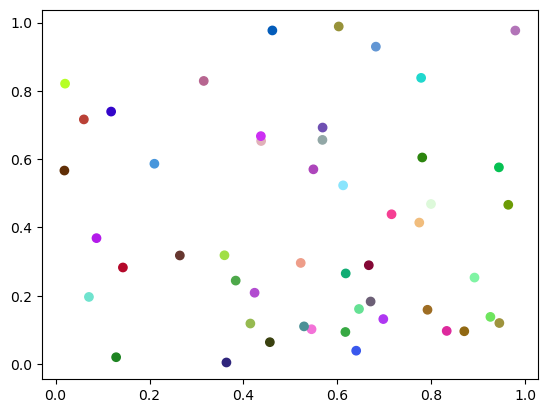

In [34]:
# 创建图形
fig, ax = plt.subplots()
# 默认figsize/get_size_inches:[6.4,4.8];dpi:100;实际像素尺寸:[640,480]
#scatter = ax.scatter(xy[:,0], xy[:,1], c=colors, picker=10) # 设置阈值为10像素
scatter = ax.scatter(x, y, c=colors, picker=10)

In [35]:
# 连接点击事件和回调函数
pick_id = fig.canvas.mpl_connect('pick_event', on_pick)

#fig.canvas.mpl_disconnect()

In [31]:
#help(fig.canvas.mpl_connect)
#help(ax.scatter)

In [36]:
# 设置散点图支持拾取
scatter.set_picker(True)
# 显示图形
plt.show()

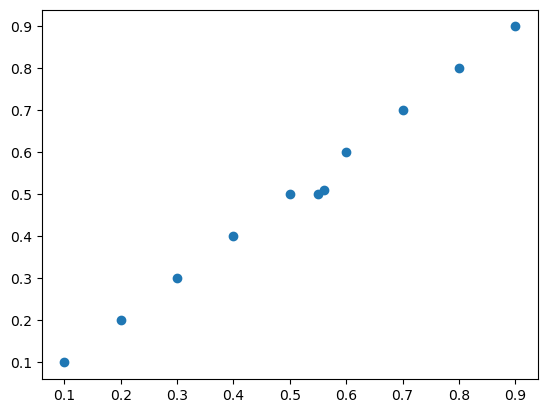

In [39]:
import numpy as np

# 创建一个 100x2 的二维数组
coordinates = np.array([
    [0.1, 0.1],
    [0.2, 0.2],
    [0.3, 0.3],
    # ... 其他坐标
    [0.9, 0.9]
])

# 代入目标坐标
target_x, target_y = xdata[index], ydata[index]

# 设置容差
tolerance = 1e-6

# 使用布尔索引来查找匹配的坐标
matches = (np.abs(xy[:, 0] - target_x) < tolerance) & (np.abs(xy[:, 1] - target_y) < tolerance)

# 获取匹配的索引
target_indices = np.where(matches)[0]

# 打印结果
if len(indices) > 0:
    print(f"找到坐标 ({target_x}, {target_y}) 在索引位置: {target_indices}")
else:
    print(f"未找到坐标 ({target_x}, {target_y})")